In [1]:
# organizing imports 
import cv2 
import numpy as np 
from PIL import Image
import time
import matplotlib.pyplot as plt
%matplotlib inline

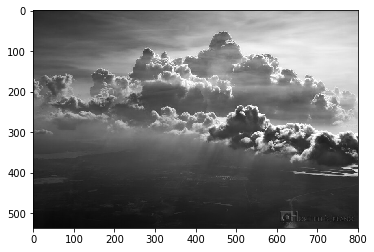

In [2]:
# path to input image specified and  
# image is loaded with imread command 
image = cv2.imread('../clouds.jpg') 

_ = plt.imshow(Image.fromarray(image))

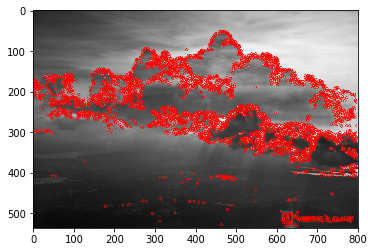

In [11]:
fast = cv2.FastFeatureDetector_create()
kp = fast.detect(image,None)
out_image = image.copy()
cv2.drawKeypoints(image, kp, out_image, color=(255,0,0))
_ = plt.imshow(Image.fromarray(out_image))

In [15]:
images = [ "../clouds.jpg", "../xilinx.JPG", "../dark.jpg", "../input.jpg", "../mountain.jpeg", "../pencils.jpg", "../train.jpg", "../trees.jpg", "../marble.jpg", "../newyork.jpg"]
sizes = []
times = []
for string in images:
    image = cv2.imread(string) 
    width = image.shape[1]
    height = image.shape[0]

    
    timea = time.time()
    kp = fast.detect(image,None)
    times.append((time.time() - timea)) 
    
    
    sizes.append(width*height)

print(times)
print(sizes)

[0.12864160537719727, 0.0050699710845947266, 0.004871368408203125, 0.42362403869628906, 0.03538870811462402, 0.01648116111755371, 0.33413219451904297, 1.3505780696868896, 0.04468846321105957, 1.8124053478240967]
[428800, 40000, 50274, 2073600, 156000, 50325, 1440000, 5061000, 147456, 8294400]


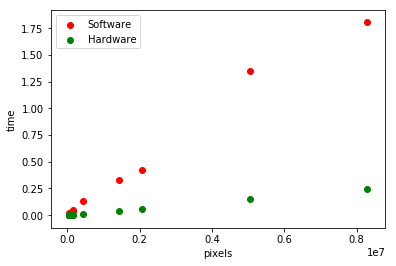

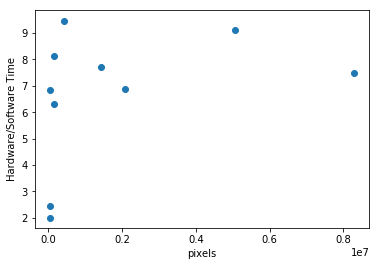

In [17]:
pl_times = [0.01358938217163086, 0.0020782947540283203, 0.0024194717407226562, 0.06148934364318848, 
            0.0056056976318359375, 0.0024042129516601562, 0.0432279109954834, 0.14805030822753906, 
            0.005493640899658203, 0.2416231632232666]
plt.scatter(sizes, times, color="red", label="Software")
plt.scatter(sizes, pl_times, color="green", label="Hardware")
plt.legend()
plt.ylabel("time")
plt.xlabel("pixels")
plt.show()
speed_up = [times[i]/pl_times[i] for i in range(len(times))]
plt.scatter(sizes, speed_up)
plt.ylabel("Hardware/Software Time")
plt.xlabel("pixels")
plt.show()